<h1>Clustering Analysis</h1>
<br/>
<p>
    This notebook provides a guide to Clustering Analysis, an unsupervised learning tasks, where algorithms have to
    automatically learn patterns from data by themselves as no target variables are defined beforehand.
    <br/>
    <br/>
    When a dataset does not provide a target variable the use of <b>Clustering Analysis Algorithms would uncover natural 
    patterns by grouping similar data points.</b>
    <br/>
    <br/>
    Clustering Analysis Algorithms are well known and applied in the data science industry for grouping and highlighting
    similar data points, detecting outliers and showing known and unknown patterns in the dataset. Some of the common 
    uses of Clustering Analysis Algorithms are:
    <ul>
        <li>Fraud detection by identifying unusual clusters from the data.</li>
        <li>Uncover natural patterns by grouping similar data points.</li>
        <li>Prediction of new tendencies on natural individuals.</li>
    </ul>
</p>


<p>
    <h2>Overview</h2>
    <br/>
    The goal of this notebook is to bring a guide of how to work with an unlabeled dataset, this kind of dataset are dealt with unsupervised learning tasks and Clustering Analysis Algorithms, the following list of tasks and algorithm are helpful to properly deal with unlabeled dataset, this notebook will explain every single of this taks:
    <ul>
        <li>Load and Visualize Data and Clusters with Scatter Plots.</li>
        <li>Prepare Data for Cluster Analysis.</li>
        <li>Perform Centroid Clustering with <a href=''>K-Means</a></li>
        <li>Interpret Clustering Results.</li>
        <li>Determine the optimal number of clusters for a given dataset.</li>
    </ul>
<br/>
<div style='background-color:#f1fbff;padding:2%;'>
    <h3><i>Unsupervised Learning tasks are dealt with algorithms that must automatically learn patterns from data by themselves 
        as no target variables are not present, the target variable is unknown</i>.</h3>
    <br/>
</div>
<br>
<hr>
<h2>Dataset Description</h2>
<br>
The Clustering Analysis will be done with an open source dataset shared publicly by the <a href='https://www.ato.gov.au/'>Australian Taxation Office (ATO)</a>. The dataset consists of statistics about each postcode (also known as a zip code, which is an identification code used for sorting mail by area) in Australia during the financial year of 2014-15.
<br>
<br>
The Australian Taxation Office (ATO) dataset can be downloaded from <a href='https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'>here</a>.
<br>
<br>
The Clustering Analysis will be done for <code>Average net tax</code> and <code>Average total deductions</code> features (columns). The objective is to find clusters (or groupd) of postcodes sharing similar patterns in terms of tax received and money deducted.
<br>
<h2>Import Necessary Libraries and Packages</h2>

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<p>
<h2>Exploratory Data Analysis</h2>
<h4>What it is Exploratory Data Analysis?</h4>
<br>
Exploratory Data Analysis is a critical process of performing initial investigations on data in order to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
<br>
<br>
To start, we must save the link for downloading the dataset in a constant.

In [5]:
FILE_URL = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'

By using <code>pandas</code> library and its function <code>read_csv()</code> and passing as a parameter the <code>FILE_URL</code>, the dataset is loaded into memory.

In [6]:
df = pd.read_csv(FILE_URL)

Now the dataset is loaded into memory, with the function <code>info</code>, let's display info releated to  the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Postcode                              2473 non-null   int64
 1   Count taxable income or loss          2473 non-null   int64
 2   Average taxable income or loss        2473 non-null   int64
 3   Median taxable income or loss         2473 non-null   int64
 4   Count salary and wages                2473 non-null   int64
 5   Average salary and wages              2473 non-null   int64
 6   Median salary and wages               2473 non-null   int64
 7   Count net rent                        2473 non-null   int64
 8   Average net rent                      2473 non-null   int64
 9   Median net rent                       2473 non-null   int64
 10  Count total income or loss            2473 non-null   int64
 11  Average total income or loss          2473 

<code>info</code> displays:
<ul>
    <li>Columns names.</li>
    <li>Columns data types.</li>
    <li>Quantity of rows.</li>
    <li>Quantity of null values.</li>
    <li>Memory usage.</li>
</ul>

This information can be accessed by individual releated function, these functions are:
<br>
<br>
<code>shape()</code>: displays number of rows and number of columns.

In [8]:
df.shape

(2473, 28)

<code>count</code>: displays the number of values in each column.

In [9]:
df.count()

Postcode                                2473
Count taxable income or loss            2473
Average taxable income or loss          2473
Median taxable income or loss           2473
Count salary and wages                  2473
Average salary and wages                2473
Median salary and wages                 2473
Count net rent                          2473
Average net rent                        2473
Median net rent                         2473
Count total income or loss              2473
Average total income or loss            2473
Median total income or loss             2473
Count total deductions                  2473
Average total deductions                2473
Median total deductions                 2473
Count total business income             2473
Average total business income           2473
Median total business income            2473
Count  total business expenses          2473
Average total business expenses         2473
Median total business expenses          2473
Count net 

<code>dtypes</code>: display the data type of each column presented in the dataset.

In [10]:
df.dtypes

Postcode                                int64
Count taxable income or loss            int64
Average taxable income or loss          int64
Median taxable income or loss           int64
Count salary and wages                  int64
Average salary and wages                int64
Median salary and wages                 int64
Count net rent                          int64
Average net rent                        int64
Median net rent                         int64
Count total income or loss              int64
Average total income or loss            int64
Median total income or loss             int64
Count total deductions                  int64
Average total deductions                int64
Median total deductions                 int64
Count total business income             int64
Average total business income           int64
Median total business income            int64
Count  total business expenses          int64
Average total business expenses         int64
Median total business expenses    

<code>dtypes.value_counts</code>: Returns the data types of the columns found in the dataset and how many columns are which that data type. 

In [11]:
df.dtypes.value_counts()

int64    28
dtype: int64

<code>isnull().values.any()</code>: Checks if there are any null values in the dataset.

In [12]:
df.isnull().values.any()

False

As it was explained earlier that the Clustering Analysis will be done by using only two features, to select such specific features/colums, use the function <code>read_csv</code> with the <code>usecols</code> parameters with the names of the columns that are going to be used.

In [13]:
df = pd.read_csv(FILE_URL, usecols=['Postcode', 'Average net tax', 'Average total deductions'])

The <code>head</code> function will display the first <i>n</i> values of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [14]:
df.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


The <code>tail</code> function will display the last <i>n</i> samples of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [15]:
df.tail()

,Postcode,Average total deductions,Average net tax
2468,870,2377,14788
2469,872,1218,9017
2470,880,2309,16574
2471,885,3039,28795
2472,886,2191,18141


The <code>sample</code> function will display <i>n</i> random samples of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [16]:
df.sample(5)

,Postcode,Average total deductions,Average net tax
2111,6152,2968,25010
1506,4490,2051,9589
1911,5351,2112,13237
2424,7301,2024,12727
2404,7255,1839,11843


Using the functions <code>head()</code>, <code>tail</code> and <code>sample</code> gives an overview of how the samples of the dataset are, as we know by the methods <code>dtypes.value_counts()</code>, the dataset is formed by only integer values, this means that the dataset is continuos.
<br>
<br/>
The method <code>describe()</code>: Returns basic stadistics values for each feature.

In [17]:
df.describe()

,Postcode,Average total deductions,Average net tax
count,2473.000000,2473.000000,2473.000000
mean,4098.385362,2682.669632,15857.382936
std,1496.853965,1236.193614,7915.109176
min,800.000000,629.000000,5879.000000
25%,2843.000000,2120.000000,11315.000000
50%,3874.000000,2440.000000,13618.000000
75%,5166.000000,2877.000000,17845.000000
max,7470.000000,25472.000000,90485.000000


These stadistics can be accessed individually. In the following rows each statisdict from the columns <code>Average total deductions</code> and <code>Postcode</code> will be accessed individually, as it is visible one of the columns contains blank spaces, this means that this column to has to be accessed by a different way, even though its name can be changed, for simplicity of access, this will be done once it has been demostrated how to access its statistics.
<br>
<br>
Accessing <code>count</code> for both columns.

In [18]:
df.Postcode.count()

2473

In [19]:
df['Average total deductions'].count()

2473

Accessing <code>mean</code> for both columns.

In [20]:
df.Postcode.mean()

4098.385361908613

In [21]:
df['Average total deductions'].mean()

2682.6696320258793

Accessing <code>std</code> for both columns.

In [22]:
df.Postcode.std()

1496.8539648108983

In [23]:
df['Average total deductions'].std()

1236.193614178289

Accessing <code>min</code> for both columns.

In [24]:
df.Postcode.min()

800

In [25]:
df['Average total deductions'].min()

629

Accesing the <code>quantile</code>, this is done by accesing the percentiles and should all be in the interval [0, 1].
<br>
<br>
<b>Quantiles and Percentiles brief explanation</b>
<br>
<br>
<b>Quantiles</b>:
<blockquote>
    In statistics and probability quantiles are cut points dividing the range of a probability distribution into continuous 
    intervals with equal probabilities, or dividing the observations in a sample in the same way. There is one fewer 
    quantile than the number of groups created. Thus quartiles are the three cut points that will divide a dataset into 
    four equal-sized groups.
    <i>From <a href='https://en.wikipedia.org/wiki/Quantile'>Quantile - Wikipedia</a></i>
</blockquote>
<b>Percentile</b>:
<blockquote>
    There is no standard definition of percentile, however all definitions yield similar results when the number 
    of observations is very large and the probability distribution is continuous.
    <i>From <a href='https://en.wikipedia.org/wiki/Percentile'>Percentile - Wikipedia</a></i>
</blockquote>
Quantiles for <code>Postcode</code>:

In [26]:
df.Postcode.quantile(0.25)

2843.0

In [27]:
df.Postcode.quantile(0.50)

3874.0

In [28]:
df.Postcode.quantile(0.75)

5166.0

In [29]:
df.Postcode.quantile(1)

7470.0

Quantiles for <code>Average total deductions</code>:

In [30]:
df['Average total deductions'].quantile(0.25)

2120.0

In [31]:
df['Average total deductions'].quantile(0.50)

2440.0

In [32]:
df['Average total deductions'].quantile(0.75)

2877.0

In [33]:
df['Average total deductions'].quantile(1)

25472.0

Accessing <code>max</code> for both columns.

In [34]:
df.Postcode.max()

7470

In [35]:
df['Average total deductions'].max()

25472

Changing the name of columns with blank spaces, for easier accessibility. This is done by the method <code>rename</code>, by passing a dictionary with the name of the column(s) that is wanted to be changed and its new name, as the parameter <code>column</code> and the <code>True</code> for the parameter <code>inplace</code>, this will modify the dataset. <a href=''>check the docs</a> for a better understanding.

In [36]:
df.rename(columns={"Average total deductions": "Average_total_deductions", "Average net tax": "Average_net_tax"}, inplace=True)

Check the changes, by trying to access a metric.

In [37]:
df.Average_total_deductions.mean()

2682.6696320258793

In [38]:
df.Average_net_tax.mean()

15857.38293570562

Nice! Their names were changed, now it is easier to access their info.

<h3>Load and Visualize Data and Clusters with Scatter Plots</h3>
<br>
<div style="margin:10px auto;">
  <p>
      <a href='https://en.wikipedia.org/wiki/Scatter_plot'>Scatter plot</a>, from Wikipedia says:
  </p>
  <blockquote style='margin-left: 0;padding-left: 1em;border-left: 5px solid deepPink;'>
    A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.
  </blockquote>
</div>
<h4>Plotting Distribution Plots</h4>
<br>
The distribution plot, as the name suggests is used for one purpose; displaying the distribution and range of data values over a scale. A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 
<br>
<br>
The x-axis is the value of the variable just like in a histogram, <a href='https://stats.stackexchange.com/questions/48109/what-does-the-y-axis-in-a-kernel-density-plot-mean'>but what exactly does the y-axis represent?</a> The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. <a href='https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok'>The difference is the probability density is the probability per unit on the x-axis.</a> To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.
<br>
<br>
The method <code>distribution_plot</code> takes the column to be plotted, a title to give a name to the plot, the label of the x axes and the fontsize, just some back and front end properties.

In [39]:
def distribution_plot(column, title, xlabel):
    sns.set(rc={"figure.figsize": (12,  6),
                "axes.titlesize": 24,
                "axes.labelsize": 18},
            style="darkgrid")

    dist_plot = sns.distplot(column)
    dist_plot.axes.set_title(title)
    dist_plot.set_ylabel('Density')
    dist_plot.set_xlabel(xlabel)

Let's plot the <code>Average_net_tax_distribution</code> column.

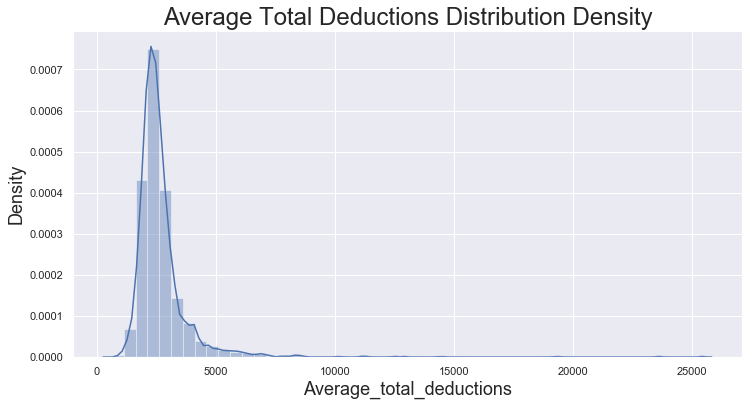

In [40]:
distribution_plot(df.Average_total_deductions, 'Average Total Deductions Distribution Density' , df.columns[1])

It is clear that most of the values from <code>Average_total_deductions</code>, between the ranges from 0 to 5000, even though it can be seem that the these values shared closely probabilities to appear again. Now let's plot the label <code>Average_net_tax</code> distribution.
<br>

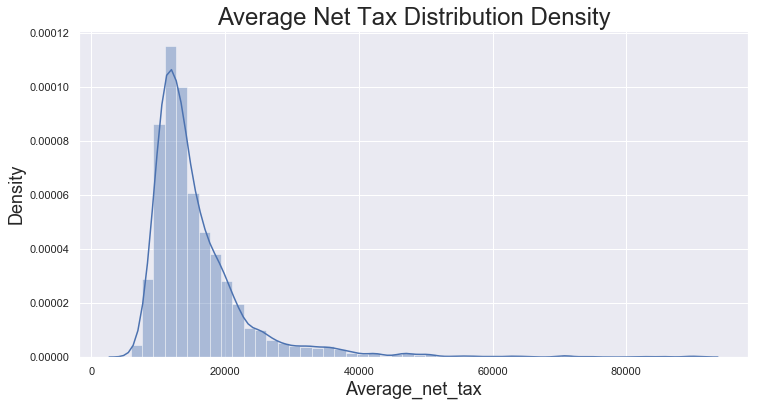

In [41]:
distribution_plot(df.Average_net_tax, 'Average Net Tax Distribution Density', df.columns[2])

It happens something very similar, the distribution is more on the left side of the x axes, most of the values are in the range from 0 to 10000, but they do also share a similar probability of appeareance. 
<br>
<br>
<b>Skewness</b>: It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail.
<br>
<br>
<img src='images/skewness.png' alt='Skewness Image from Wikipedia' style="width:50%;">
<br>
<b>Kurtois</b>: Describes the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.
<br>
<br>
<b><i>What about our data?</b></i>
<br>
<br>
The tails on the right side of the distributions are longer and fatter. The mean and median will be greater than the mode, this is telling us that there are outliers, but due to the close probobality of them, they might not affect negatively.
<br>
<br>
Let's plot the linearity between the feature <code>Average_total_deductions</code> and <code>Average_net_tax</code> the regression label, this is done through a Regression analysis which is a form of predictive modelling technique that investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for finding the causal effect relationship between the variables. <a href='https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/'>Check here for a better understanding.</a>

In [42]:
def distribution_lmplot(title, x, y, data):
    sns.set(rc={"axes.titlesize": 24,
                "axes.labelsize": 18})
    dist_plot = sns.lmplot(x=x, y=y, data=data, size=5.5, aspect=2)
    ax = plt.gca()
    ax.set_title(title)

c:\users\kleye\anaconda3\envs\ai\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


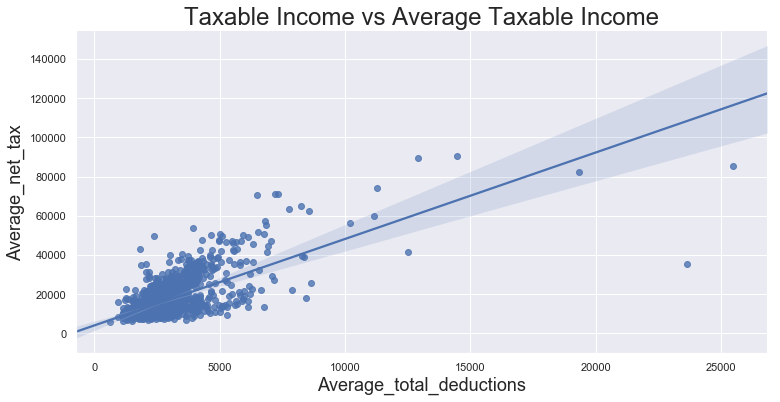

In [43]:
distribution_lmplot('Taxable Income vs Average Taxable Income', df.columns[1], df.columns[2], df)

Poor linearity, the independence is not relevant. Let's see with the feature <code>Postcode</code> and the label </code>Average_net_tax</code>.

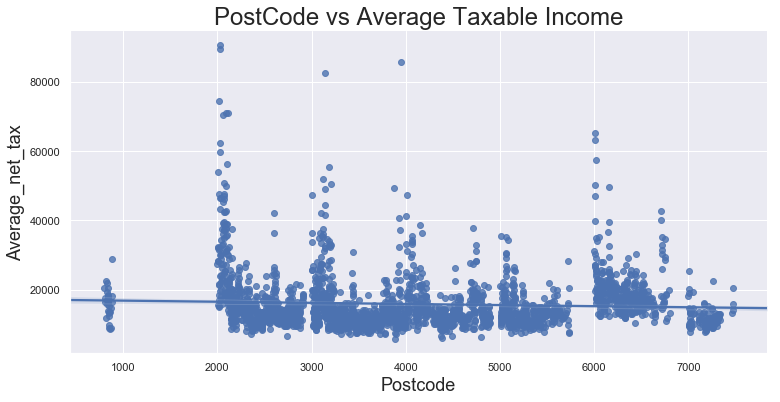

In [44]:
distribution_lmplot('PostCode vs Average Taxable Income', df.columns[0], df.columns[2], df)

The dependence is still poor, there is not an important remarkable relationship that determines that the <code>Postcode</code> is strongly related to the <code>Average_net_tax</code>. Let's go with some swarm plot.
<br>
<br>
<b>Swarm Plots</b>: In a swarm plot the locations of points are adjusted automatically to avoid overlap even if the jitter value is not applied. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them). These plots resemble bees swarming, 

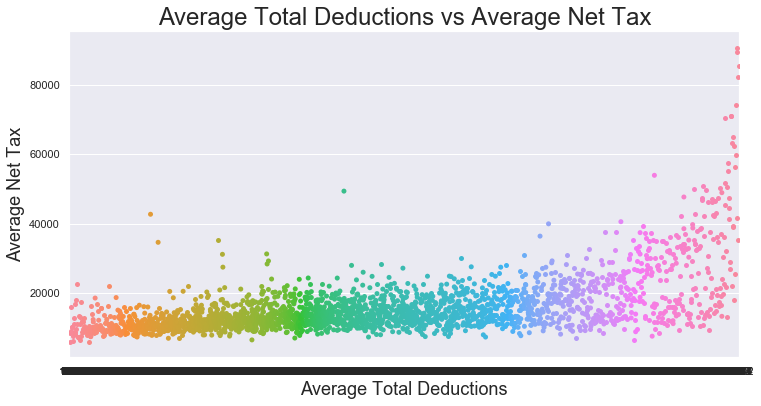

In [45]:
sns.set(rc={"figure.figsize":(12,  6),
                "axes.titlesize":24,
                "axes.labelsize":18},
            style="darkgrid")

dist_plot = sns.swarmplot(x=df.columns[1], y=df.columns[2], data=df);
dist_plot.axes.set_title('Average Total Deductions vs Average Net Tax')
dist_plot.set_ylabel('Average Net Tax')
dist_plot.set_xlabel('Average Total Deductions')
dist_plot


According this swarm plot, the <code>Average_total_deductions</code>, are not directly related to the <code>Average_net_tax</code>.
<br>
<br>
<a href='https://www.pgconocimiento.com/diagrama-boxplot/'>b</a>
<a href='https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51'>Medium</a>
<a href='https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c'>Medium</a>

Our Exploratory Data Analysis has finished, through the EDA we learned that the dataset:
<ul>
    <li>The dataset does not have a normal distribution.</li>
    <li>High levels of positive skewness and kurtoise, very few outliers</li>
    <li>The probability of getting the same values are very low.</li>
    <li>There is not independence or strong relationship between <code>Average_total_deductions</code>, 
        <code>Postcode</code> and <code>Average_net_tax</code>.</li>
</ul>
<h2>Prepare Data for Cluster Analysis</h2>
<h3>Feature Scaling</h3>
<br>
To make the inference of the Clusterting Algorithm work faster, the technique that I will apply here is <code>MinMaxScaler</code>, <i>but why <code>MinMaxScaler</code> and not other methods?</i>:
<ul>
    <li>Preserves the shape of the original distribution.</li>
    <li>Doesn't reduce the importance of outliers.</li>
    <li>Least disruptive to the information in the original data.</li>
    <li>New values are going to be between 0 to 1.</li>
</ul>
<br>
<code>MinMaxScaler</code> <b>quick explanation!</b>: Scales features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. Its formula:
<br>
<br>
<div style='text-align:center;font-size:22px;'>
    $X_{sc} =  \frac{X - X_{min}}{X_{max} - X_{min}}$
</div>
<br>

Let's create the variable <code>X</code> that will hold the features <code>Average_net_tax</code> and <code>Average_total_deductions</code>.
<br>

In [46]:
X = df[['Average_net_tax', 'Average_total_deductions']]

Take a look at <code>X</code>, with the method <code>info</code> and <code>max</code>

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Average_net_tax           2473 non-null   int64
 1   Average_total_deductions  2473 non-null   int64
dtypes: int64(2)
memory usage: 38.8 KB


In [48]:
X.max()

Average_net_tax             90485
Average_total_deductions    25472
dtype: int64

Great, the <code>X</code> tuple, holds the feature <code>Average_net_tax</code> and <code>Average_total_deductions</code>.
<br>Now create the variable <code>min_max_scaler</code> that will be an object from the <code>MinMaxScaler</code>

In [49]:
min_max_scaler = MinMaxScaler()

Now fit <code>X</code> into the <code>min_max_scaler</code> object

In [50]:
min_max_scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

Create <code>X_scale</code> and scale the data with <code>transform</code>, the <code>transform</code> returns a <code>numpy</code> array.

In [51]:
X_scaled = min_max_scaler.transform(X)

Take a look at <code>X_scaled</code>, with the method <code>dtyoe</code> and <code>max</code>.

In [52]:
X_scaled.dtype

dtype('float64')

In [53]:
X_scaled[:,0].min(), X_scaled[:,0].max(), X_scaled[:,1].min(), X_scaled[:,1].max()

(0.0, 1.0000000000000002, 0.0, 1.0)

The <code>Average_net_tax</code> and <code>Average_total_deductions</code> were scaled, now they are in a smaller range, this will help in faster convergance.
<br>
<h2>Perform Centroid Clustering with K-Means</h2>
<br>
In this section of the notebook, the <a href='https://scikit-learn.org/stable/modules/clustering.html#k-means'>K-Means</a> algorithm will be explained, later in the term Cetroid Clustering will be too and at the end of this section <i><b>Centroid Clustering with K-Means</b></i> will be implemented.
<br>
<h3>K-Means</h3>
<br>
Due to its simplicity and high performance K-Means is one of the most popular algorithms for clustering analysis. The objective of K-Means is to group similar data points (or observations) together that will form a cluster. Think of it as grouping elements close to each other.
<br>
<br>
The objective of cluster analysis is to group observations with similar patterns together. Investigating this is to analyze the dataset row by row with the assigned cluster for each observation. This can be quite tedious, especially if the size of your dataset is quite big, so it would be better to have a kind of summary of the cluster results.

<div style="margin:10px auto;">
    <a href='https://scikit-learn.org/stable/modules/clustering.html#k-means'>K-Means</a>, from Scikit-Learn docs says:
    <blockquote>
      The K-Means algorithm clusters data by trying to separate samples in <b><i>n</i></b> groups of equal variance, 
      minimizing a criterion known as the inertia or <b><i>within-cluster sum-of-squares</i></b>. This algorithm requires 
      the number of clusters to be specified. It scales well to large number of samples and has been used across a large 
      range of application areas in many different fields.
      <br>
      <br>
      The K-Means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean of the samples 
      in the cluster. The means are commonly called the <b><i>cluster “centroids”</i></b>; note that they are not, in 
      general, points from , although they live in the same space.
      <br>
      <br>
      The K-means algorithm aims to choose centroids that minimise the <b>inertia</b>, or <b>within-cluster sum-of-
      squares</b> criterion:
      <br>
      <br>
      <div style="text-align:center;font-size:22px;">
          $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
      </div>
      <br>
  </blockquote>
</div>

<blockquote>
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
<ul>
    <li>Inertia makes the assumption that clusters are <a href='https://en.wikipedia.org/wiki/Convex_function'>convex</a> 
        and isotropic (uniformity in all orientations), which is not always the case. It responds poorly to elongated 
        clusters, or manifolds with irregular shapes.</li>
    <li>Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very 
        high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse 
        of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior 
        to K-Means clustering can alleviate this problem and speed up the computations.</li>
</ul>
</blockquote>

<blockquote>
    K-Means steps:
    <ul>
        <li>The first step chooses the initial centroids, with the most basic method being to choose  samples from the 
            dataset. After initialization, K-means consists of looping between the two other steps. The first step 
            assigns each sample to its nearest centroid.</li>
        <li>The second step creates new centroids by taking the mean value of all of the samples assigned to each 
            previous centroid.</li>
        <li>The difference between the old and the new centroids are computed and the algorithm 
            repeats these last two steps until this value is less than a threshold. In other words, it repeats until the
            centroids do not move significantly.</li>
    </ul>
</blockquote>

<blockquote>
    Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on 
    the initialization of the centroids. As a result, the computation is often done several times, with different 
    initializations of the centroids. One method to help address this issue is the <code>k-means++</code> initialization 
    scheme, which has been implemented in <code>scikit-learn</code> (use the <code>init='k-means++'</code> parameter). 
    This initializes the centroids to be (generally) distant from each other, leading to provably better results than 
    random initialization, as shown in the reference.
</blockquote>

<blockquote>
    The algorithm supports sample weights, which can be given by a parameter <code>sample_weight</code>. This allows to 
    assign more weight to some samples when computing cluster centers and values of inertia. For example, assigning a
    weight of 2 to a sample is equivalent to adding a duplicate of that sample to the dataset <b><i>X</i></b>.
    <br>
    <br>
    A parameter can be given to allow K-means to be run in parallel, called <code>n_jobs</code>. Giving this parameter a 
    positive value uses that many processors (default: 1). A value of <code>-1</code> uses all available processors, with
    <code>-2</code> using one less, and so on. Parallelization generally speeds up computation at the cost of memory (in 
    this case, multiple copies of centroids need to be stored, one for each job).
</blockquote>

<h3>Performing Clustering Analysis</h3>
<br>
Let's, use all the default values for the <code>KMeans</code> hyperparameters except for <code>random_state</code> and <code>n_jobs</code>. Specifying a fixed random state (also called a seed) will help in getting reproducible results every time rerunning the code is needed.

In [54]:
kmeans = KMeans(random_state=42, n_jobs=-1)

Let's fit <code>X_scaled</code> into the <code>kmeans</code> cluster algorithm analysis object.

In [55]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Excellent, those are the rest of parameters and its default hyperparameter, later in the section of Hyperparameter Tuning, these parameters will be change in order to achieve a better performance. Now let's predict some <i>clusters!</i>.

In [56]:
y_preds = kmeans.predict(X_scaled)
y_preds

array([1, 1, 2, ..., 2, 1, 5])

Great, we have gotten the predicted clusters!
<br>
Add these predictions into the original <code>DataFrame</code> and take a look at five random samples with the function <code>sample</code>:


In [57]:
df['cluster'] = y_preds
df.sample(5)

,Postcode,Average_total_deductions,Average_net_tax,cluster
342,2470,1784,9443,0
1251,3938,2921,15239,2
2208,6346,5781,21135,7
1555,4572,3249,17738,5
965,3462,1871,10862,0


Look the <code>kmeans</code> <b>model has grouped the sample 1845 and 1068 on the same cluster, cluster 0 </b>, but look at the sample 1929, it is grouped on the cluster 2, it looks that the model is basing its clustering decission on a range from the feature <code>Average_net_tax</code>.
<br>
<br>
We are interested in analyzing the results of the <code>kmeans</code> model in more detail. We already know that the objective of cluster analysis is to group observations with similar patterns together. <b>But what are those patterns?</b>
<br>
<h2>Interpret Clustering Results</h2>
<br>
<b>Please start thinking how can we measure how good our model is?</b> This question will be answered in the followings steps.
<h3>Pivot Table</h3>
<br>
A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.
<br>
<br>
Pivot tables are a technique in data processing. They arrange and rearrange (or "pivot") statistics in order to draw attention to useful information.
<br>
<br>
By using the <code>pandas</code> package and its library <code>pivot_table</code>, we can get the significance of our features.
Its parameters that we are going to use are:
<ul>
    <li><code>values</code>: This parameter corresponds to the numerical 
        columns are wanted to calculate summaries for (or aggregations), 
        such as getting averages or counts. In our dataset, we will use 
        the <code>Average_net_tax</code> and 
        <code>Average_total_deductions</code> variables.</li>
    <li><code>index</code>: This parameter is used to specify the 
        columns that are wanted to see summaries for. In our case, it 
        will be the <code>cluster</code> column.</li>
    <li><code>aggfunc</code>: This is where it is specified the 
        aggregation functions that will summarize the data with, such 
        as getting averages or counts.</li>
</ul>
By  using the <code>numpy</code> implementation of <code>mean()</code> as it is more optimized for <code>pandas</code> <code>DataFrames</code>.

In [58]:
df.pivot_table(values=[df.columns[1], df.columns[2]], index=df.columns[3], aggfunc=np.mean)

,Average_net_tax,Average_total_deductions
cluster,,
0,10681.836117,2165.546973
1,30432.955882,3846.941176
2,14609.571075,2490.674907
3,70315.454545,9598.363636
4,44356.934783,5499.826087
5,20452.737470,2769.243437
6,67808.000000,22811.000000
7,15792.021978,4771.296703


This summary shows that the algorithm has grouped the data into eight clusters (clusters 0 to 7). Cluster 0 has the lowest <code>Average_net_tax</code> and <code>Average_total_deductions</code> amounts among all the clusters, while cluster 6 has the highest values. With this pivot table, we are able to compare clusters between them using their summarised values.
<br>
<br>
Interpreteing by using an aggregated view of clusters is a good way of seeing the difference between them, but it is not the only way. Another possibility is to visualize clusters in a graph. This is exactly what we are going to do now.
<h3>Cluster Visualization</h3>
<br>
The package <code>altair</code>, will allow us to visualize how these clusters are distributed, by instantiating a <code>Chart()</code> object wiht the <code>DataFrame</code> and save it into a variable called <code>chart</code>: 

In [59]:
chart = alt.Chart(df)

Let's specify the type of graph we want, a <b>scatter plot</b>, thanks to the method <code>mark_circle()</code>, save its results in a object called <code>scatter_plot</code>.

In [60]:
scatter_plot = chart.mark_circle()

The final step to see how the clusters are grouped and distributed, is to configure the <code>scatter_plot</code> by specifying the names of the columns that will be the <code>x</code> and <code>y</code> axes on the graph, with the parameter <code>color</code> is how we tell the <code>scatter_plot</code> object to color each point according to its cluster value, by adding a <code>:N</code> at the end of the <code>cluster</code> column name, this extra parameter is how <code>altair</code> understands the type of value for this column, <code>:N</code> it means the information contained in this column is categorical. The <code>Tooltip</code> parameter with the list of corresponding column names and by calling the method <code>interactive</code> will allow to hover over datapoints and displaying their values, therefore we obtained a dynamic scatter plot of how grouped and distributed the clusters are.

In [61]:
scatter_plot.encode(x='Average_net_tax', 
                    y='Average_total_deductions',
                    color='cluster:N', 
                    tooltip=['Postcode', 
                             'cluster', 
                             'Average_net_tax', 
                             'Average_total_deductions']).interactive()

alt.Chart(...)

Having an interactive scatter plot makes easier to find the boundaries between cluster, for example looking at the cluster number 3, it easy to realize its boundaries are in <code>Average_net_tax</code> close to 56K, its <code>Average_total_deductions</code> is 6.5K and most of its <code>Postcode</code> value are between 2K and 2.1K.
<h2>Determine the Optimal Number of Clusters for a Given Dataset</h2>

The <code>K-Means</code> algorithm found 8 clusters in the ATO dataset, those clusters were mainly defined by the values of the <code>Average_net_tax</code> feature.
<br>
<br>
But <b>why 8 clusters? why not 3 or 15 clusters?</b> The answer is that we used <code>K-Means</code> default value for the hyperparameter <code>n_cluster</code>, defining the number of clusters to be found, as 8.
<br>
<br>
The value of a hyperparameter isn't learned by the algorithm but has to be set arbitrarily by prior training. For <code>K-Means</code>, <code>n_cluster</code> is one of the most important hyperparameters that must be tuned. Choosing a low value will lead <code>K-Means</code> algorithm to group many data points together, even though they are very different from each other. On the other hand, choosing a high value may force the algorithm to split close observations into multiple ones, even though they are very similar.

<h4>Elbelow Method</h4>
<br>
<br>
Eight clusters were detected by the <code>K-Means</code> algorithm. Looking at the scatter plot, some of the clusters look very close to each other and have similar values. When looking at the plot, it seemed like there were between two and four different clusters, <i>this is quite suggestive</i> and it is that there is function that could help us to define the right number of clusters for a dataset. Such technique exists and it is the <b<i>Elbow method</i></b>.
<br>
<br>
<h4>How does the Elbelow Method works?</h4>
It assesses the compactness of clusters, the objective being to minimize a value known as <i>inertia</i>. The inertia is a value that says, for a group of data points, how far from each other or how close to each other they are, <i><b>it specifies the distance between data points.</b></i>
<br>
<h3>Applying Elbelow Method to ATO dataset</h3>
<br>
First a range of clusters must be define, this range of clusters will be evaluate and their results will be saved into a <code>DataFrame</code> with the name of <code>cluster</code> and an empty list called <code>inertia</code>, in this list the calculated values will be stored.

In [62]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

By creating a <code>for</code> loop that iterates over the range, inside this loop the <code>k-means</code> model must be fit with the specified number of <code>clusters</code>, extract the <code>inertia_</code>, this <code>inertia_</code> (is a method from the <code>KMeans</code> clustering algorithm method that returns the inertia from the datapoints) and store it in the <code>inertia</code> list.

In [ ]:
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, n_jobs=-1, random_state=42).fit(X_scaled)
    inertia.append(kmeans.inertia_)

Take a look at the list of <code>inertia</code> values in the <code>clusters</code> <code>DataFrame</code>:

In [ ]:
clusters['inertia'] = inertia
clusters

Let's plot a line chart using <code>altair</code> with the <code>mark_line()</code> method and specify the <code>cluster_range</code> column as the <b>x-axis</b> and <code>inertia</code> as the <b>y-aixs</b> as in the following code snipped.

An interactive plot:

In [ ]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia', tooltip=['cluster_range', 
                             'inertia']).interactive()

A static plot:

In [ ]:
alt.Chart(clusters).mark_line().encode(x='cluster_range', y='inertia')

The inertia values have been ploted against the number of clusters, now it is time to find the optimal number of clusters.
<b>How do er find the optimal number of clusters?</b> It is easy, <b><i>it is through finding the inflection point in the graph, where the inertia value starts to decrease more slowly.</i></b>
<h4><i>The inflection point is where the slope of the line almost reaches a 45-degree angle.</i></h4>
<br>
By picturing this line chart as an arm, try to find the center of the Elbow, looking at the example, it looks like the optimal number of clusters is three. Look what happend when adding more clusters, the inertia would not decrease drastically and add any value. This is the reason why we want to find the middle of the Elbow as the inflection point.

Let's retrain the <code>kmeans</code> model with this hyperparameter and plot the clusters as shown in the following code snippet:

In [ ]:
kmeans = KMeans(random_state=42, n_jobs=-1, n_clusters=3)
kmeans.fit(X)
df['cluster_elbow_method'] = kmeans.predict(X)

In [ ]:
scatter_plot.encode(x='Average_net_tax', y='Average_total_deductions', color='cluster_elbow_method:N',
tooltip=['Postcode', 'cluster_elbow_method', 'Average_net_tax', 'Average_total_deductions']
).interactive()

A static plot:

In [ ]:
scatter_plot.encode(x='Average_net_tax', y='Average_total_deductions', color='cluster_elbow_method:N')

This is different compared to the initial results. Looking at the three clusters, we can see that:
<ul>
    <li>The first cluster, the blue one, with the number 0 represents <b>postcodes</b> with the low values for both 
        <code>Average_total_deductions</code> and <code>Average_net_tax</code>.</li>
    <li>The second cluster, the orange one with the number 1, is for medium values for both 
        <code>Average_total_deductions</code> and <code>Average_net_tax</code>..</li>
    <li>The third cluster, the blue red one, with the number 2, is grouping all the <b>postcodes</b> 
        with <code>Average_net_tax</code> values above 35K.</li>
</ul>
<b>It is worth noticing that the datapoints are more spread in the third clusters; this may be indicating the outliers in this group.</b>

The importance of defining the right number of clusters is that helps in identifying the patterns that determines how the clusters are distributed and formed and this is obtained from applying the <b>Elbow Method!</b>

<h2>Initializing Clusters</h2>
<br>
The hyperparameter <code>init</code> is the hyperparameter that specifies how clusters will be initialized, the default value is <code>k-means++</code>, this clustering analysis has been performed by using this initializer, there is another kind of initializer the <code>k-means</code>. The difference between <code>k-means</code> and <code>k-means++</code> is in how they initialize clusters at the start of the training. <code>k-means</code> randomly chooses the center of each cluster (called the centroid) and then assigns each data point to its nearest cluster. If this cluster initialization is chosen incorrectly, this may lead to non-optimal grouping at the end of the training process. 

<code>k-means++</code> is an attempt to find better clusters at initialization time. <i><b>The idea behind it is to choose the first cluster randomly and then pick the next ones, those further away, using a probability distribution from the remaining data points.</b></i> Even though <code>k-means++</code> tends to get better results compared to the original <code>k-means</code>, in some cases, it can still lead to non-optimal clustering.

The hyperparameter to lower the risk of incorrect clusters is <code>n_init</code>. This corresponds to the number of times <code>K-Means</code> is run with different initializations, the final model being the best run. If there is a high number for this hyperparameter, there will be a higher chance of finding the optimal clusters, but the downside is that the training time will be longer.

<h2>Calculating the Distance to the Centroids</h2>
<br>
Similarities between data points is due to how close or how far observations are from each other, this is done through a distance measure between two points. This distance is calculated in <code>K-Means</code> with the squared Euclidean distance and its formula is:
<br>
<br>
<div style="text-align:center;">
    $d(x,y)^2 = \sum_{i=1}^{n}(x_i - y_i)^2$
</div>

This formula is the sum of the squared difference between the data coordinates. Here, $x$ and $y$ are two data points and the index, $i$, represents the number of coordinates. If the data has two dimensions, $i$ equals $2$. Similarly, if there are three dimensions, then $i$ will be $3$.
<br>
Let's apply this formula to the ATO Dataset.

By grabbing the values, <i>the coordinates</i> from the first two observations and print them.
<br>
<br>
From the package <code>pandas</code> the method <code>iloc</code> is used to access the values from rows and columns by a the <code>DataFrame</code> index. An example, if we wanted the value from row number <code>1250</code> and column number <code>12</code>, the sintax would be <code>dataframe.iloc[1250, 12]</code>.
<br>
<br>
Time to grab the coordinates.

In [ ]:
x = X.iloc[0,].values
y = X.iloc[1,].values

Print the coordinates

In [ ]:
print(x)
print(y)

The coordinates for $x$ are <code>(27555, 2071)</code> and the coordinates for $y$ are <code>(28142, 3804)</code>, the formula is telling us to calculate the squared difference between each axis of the two datapoints and sum them:

In [ ]:
squared_euclidean = (x[0] - y[0])**2 + (x[1] - y[1])**2
print(squared_euclidean)

<code>K-Means</code> uses this metric to calculate the distance between each data point and the center of its assigned cluster (also called the centroid). Here is the basic logic behind this algorithm:
<ol>
    <li>Choose the centers of the clusters (the centroids) randomly.</li>
    <li>Assign each data point to the nearest centroid using the squared Euclidean distance.</li>
    <li>Update each centroid's coordinates to the newly calculated center of the data points assigned to it.</li>
    <li>Repeat Steps <i>2</i> and <i>3</i> until the clusters converge (that is, until the cluster assignment doesn't 
        change anymore) or until the maximum number of iterations has been reached.</li>
</ol>

And that is the <code>K-Means</code> algorithm is as simple as that. The centroids can be extracted after fitting a <code>k-means</code> model with <code>cluster_centers_</code>.

In [ ]:
kmeans = KMeans(random_state=42, n_clusters=3, init='k-means++', n_init=5)
kmeans.fit(X)
df['cluster_for_centroid_extraction'] = kmeans.predict(X)

Extract the centroids into a <code>DataFrame</code> with <code>kmeans.cluster_centers_</code> and print them:

In [ ]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=['Average_net_tax', 'Average_total_deductions'])
print(centroids)

Plot the usual scatter plot but will be assign it to a variable called <code>chart1</code>

In [ ]:
chart1 = alt.Chart(df).mark_circle().encode(x='Average_net_tax', y='Average_total_deductions',color='cluster_for_centroid_extraction:N',
tooltip=['Postcode', 'cluster_for_centroid_extraction', 'Average_net_tax', 'Average_total_deductions']
).interactive()
chart1

Now create a second scatter plot only for the centroids called <code>chart2</code>:

In [ ]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(x='Average_net_tax', y='Average_total_deductions',color=alt.value('black'),
tooltip=['Average_net_tax', 'Average_total_deductions']).interactive()
chart2

Let's combine the two charts, this is extremely easy with <code>altair</code>

In [ ]:
chart1 + chart2

Now it is easier to see which centroids the observations are closest to.

<h2>Summary</h2>
<br>
<b>Cluster Analysis</b> with the <code>K-Means</code> algorithm is very popular <i><b>for segmenting customer profiles as well as detecting suspicious transactions or anomalies.</b></i>
<br>
<br>
Some other algorithms that can be used for <b>Clustering Analysis</b> are:
<ul>
    <li><a href=''>Hierarchical Clustering.</a></li>
    <li><a href=''>Principal Component Analysis.</a></li>
    <li><a href=''>Gaussian Mixture Model.</a></li>
</ul>

In [ ]:
!git add . clustering_analysis.ipynb
!git commit -m "Clusters Patterns Explained"
!git push origin master --force